In [43]:
import os
import pandas as pd
from mutagen.easyid3 import EasyID3
from mutagen.mp4 import MP4
from mutagen.flac import FLAC
import matplotlib.pyplot as plt

In [44]:
dlist = list()  #make a list to store the data

directory = "D:\Music\mp3" # Set the path to the directory containing your MP3 files
for filename in os.listdir(directory): # Loop over each MP3 file in the directory
    if filename.endswith(".mp3"):

        mp3_path = os.path.join(directory, filename)  # Set the path to the MP3 file

        audio = EasyID3(mp3_path) # Load the MP3 file using the EasyID3 module of mutagen

        # Get the metadata
        title = audio.get("title", [""])[0]
        artist = audio.get("artist", [""])[0]
        album = audio.get("album", [""])[0]
        year = audio.get("date", [""])[0]
        genre = audio.get("genre", [""])[0]

        dlist.append((title, artist, album, genre, year))


        metadata_df = pd.DataFrame(dlist, columns=["Title", "Artist", "Album", "Genre", "Year"])

    elif filename.endswith(".m4a"): # loop over each m4a file in the directory
        mp4_path = os.path.join(directory, filename) # Set the path to the M4A file

        audio1 = MP4(mp4_path) # Load the m4a files using the mp4 module from mutagen

        # Get the metadata
        title1 = audio1.get("title", [""])[0]
        artist1 = audio1.get("artist", [""])[0]
        album1 = audio1.get("album", [""])[0]
        year1 = audio1.get("date", [""])[0]
        genre1 = audio1.get("genre", [""])[0]

        dlist.append((title1, artist1, album1, genre1, year1))

        metadata_df = pd.DataFrame(dlist, columns=["Title", "Artist", "Album", "Genre", "Year"])

    elif filename.endswith(".flac"): # loop over each flac file in the directory

        fl_path = os.path.join(directory, filename) # Set the path to the FLAC file

        audio2 = FLAC(fl_path) # Load the flac files using the mp4 module from mutagen

        # get the metadata
        title2 = audio2.get("title", [""])[0]
        artist2 = audio2.get("artist", [""])[0]
        album2 = audio2.get("album", [""])[0]
        year2 = audio2.get("date", [""])[0]
        genre2 = audio2.get("genre", [""])[0]

        dlist.append((title2, artist2, album2, genre2, year2))

        metadata_df = pd.DataFrame(dlist, columns=["Title", "Artist", "Album", "Genre", "Year"]) # write the metadata from list to a dataframe


print(metadata_df.head())


                           Title                      Artist   
0                    Alone Again                  The Weeknd  \
1                       Cry Baby              Official髭男dism   
2  Symphony (feat. Zara Larsson)  Clean Bandit, Zara Larsson   
3                                                              
4                            馬と鹿                        米津玄師   

                    Album    Genre        Year  
0    After Hours (Deluxe)      R&B  2020-03-23  
1                Cry Baby    Anime        2021  
2  What Is Love? (Deluxe)  Electro        2018  
3                                               
4                     馬と鹿     JPop        2019  


In [45]:
metadata_df
metadata_df.to_csv('my_data.csv', index=False)

In [46]:
ddf = pd.read_csv('my_data.csv')
ddf = ddf.dropna()
ddf.to_csv('my_data_cleaned.csv', index=False)

### Ploting a bar chart to get the most song by top 15 Artist in my playlist

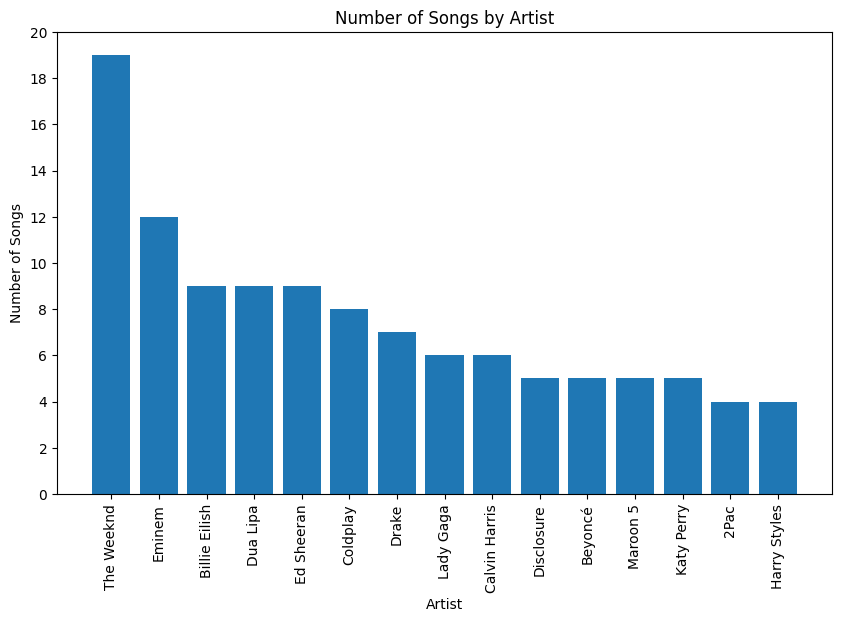

In [47]:
#selecting the top 15 artists
artist_counts = ddf['Artist'].value_counts().nlargest(15)
# plotting the bar graph
plt.figure(figsize=(10,6))
plt.bar(artist_counts.index, artist_counts.values)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Artist')
plt.yticks(range(0,artist_counts.max()+2, 2))
plt.show()

##### well who dosen't like The weeknd...
##### but my favorite is eminem and dua lipa

### Plotting a stackplot for the top Genres in the playlist

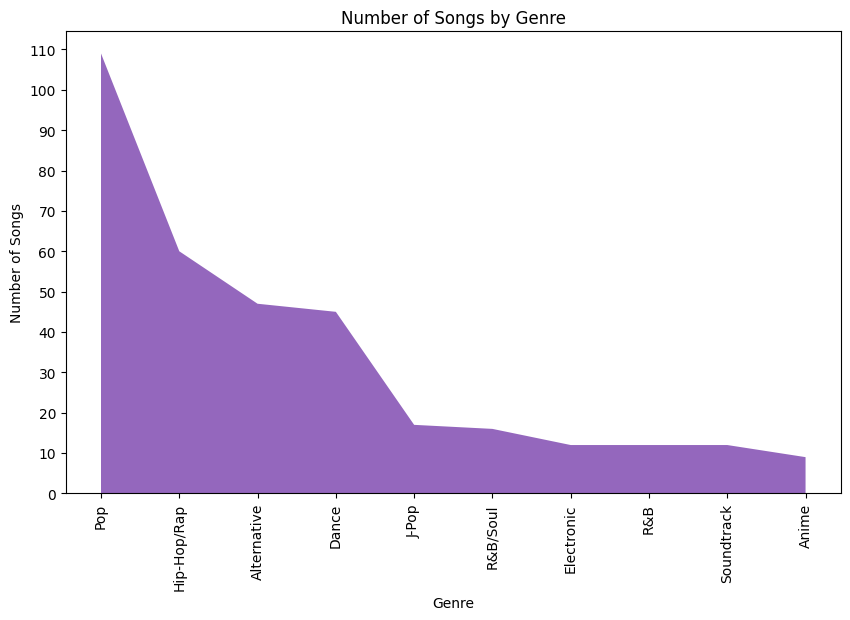

In [48]:
Genre_counts = ddf['Genre'].value_counts().nlargest(10)
# plotting the stackplot
colors = ['tab:purple']
plt.figure(figsize=(10,6))
plt.stackplot(Genre_counts.index, Genre_counts.values, colors=colors)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('Number of Songs')
plt.title('Number of Songs by Genre')
plt.yticks(range(0,Genre_counts.max()+2, 10))
plt.show()

##### because pop is much easy to sing along to..